## Random Forest - MOF_photocatalytic activity - 2bins - 73/27

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
import pycm
from ast import literal_eval
import sys
sys.path.append("../plotutils/")
from plotutils import *
plt.style.use("../plotutils/your.mplstyle")
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator

In [2]:
def smiles_to_fingerprint(smiles) -> np.ndarray:
    """
    Convert a SMILES string to a molecular fingerprint using RDKit.
    """
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    # generate Morgan fingerprint
    mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=20, fpSize=512)
    fingerprint = mfpgen.GetFingerprint(mol)

    return np.array(fingerprint)

In [3]:
df = pd.read_csv(f"../PhotocatCO2conversionMOFs_dataset.csv", sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   catalyst_name             77 non-null     object 
 1   linker_name               77 non-null     object 
 2   cocatalyst                11 non-null     object 
 3   SMILES                    77 non-null     object 
 4   source_for_metal          77 non-null     object 
 5   band_gap_for_composite    21 non-null     object 
 6   band_gap_for_MOF          29 non-null     object 
 7   band_gap_for_cocatalyst   9 non-null      float64
 8   CB_for_MOF                25 non-null     object 
 9   CB_for_cocatalyst         9 non-null      float64
 10  VB_for_MOF                25 non-null     object 
 11  VB_for_cocatalyst         9 non-null      float64
 12  light_source              77 non-null     object 
 13  sacrificial_agent         77 non-null     object 
 14  reaction_pha

In [4]:
df["mp_bin"] = df["SMILES"].apply(smiles_to_fingerprint)
df["mp_bin"]

0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                            ...                        
72    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...
73    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
74    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
75    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
76    [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, ...
Name: mp_bin, Length: 77, dtype: object

In [5]:
print(len(df["product"].unique()))
df["product"].unique()

8


array(['CH3COOH', 'MeOH', 'H2', 'CO', 'CH4', 'HCOOC', 'HCOO', 'COOH'],
      dtype=object)

In [6]:
encoder_product = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_product = encoder_product.fit_transform(df[["product"]])
df = pd.concat([df, one_hot_product], axis=1)

In [7]:
print(len(df["source_for_metal"].unique()))
df["source_for_metal"].unique()

43


array(['ZrCl4', 'ZnO/Pt', 'In(NO3)3·xH2O', 'titanium isopropoxide',
       'Co(NO3)2·6H2O', 'CoCl2∙6H2O', 'In(NO3)3·xH2O and Fe(NO3)3',
       'ZrOCl2·8H2O', 'Re(CO)5Cl', 'zinc acetate hexahydrate',
       'Zn(NO3)2·6H2O', 'zirconium (IV) chloride', 'isopropyl titanate',
       'Titanium(IV) ethoxide', 'Co(NO3)2·H2O', 'Co(NO3)2•6H2O', 'Cu2O',
       'ZrCl4 and tetrapropylorthortitanate', 'Co(CH3CHO)2·6H2O',
       'Zn(NO3)2·6H2O and Ni(NO3)2·6H2O', 'copper nitrate trihydrate',
       'Mg(NO3)2·6H2O', 'Zirconium tetrachloride',
       'Ru(4,4′-H2dcbpy)2Cl2 and Cd(ClO4)2·6H2O', 'Ni(NO3)2·6H2O',
       'Ni(NO3)2·6H2O, ZrCl4, and Cu(NO3)2·3H2O',
       'Ni(phen)(oba)]n·0.5nH2O', 'titanium tetrachloride',
       'Ce(NO3)3·6H2O', 'FeCl3·6H2O', 'Cu(NO3)2·6H2O', 'Cr(NO3)3·9H2O',
       'Co(NO3)2 · 6H2O', 'Ni(ClO4)2·6H2O', 'zinc nitrate hexahydrate',
       'Zn(NO3)2', 'tetra-n-butyl titanate', '9 RuCl3·3H2O/ ZrOCl2·H2O',
       'Ir2(ppy)4Cl2', 'RhCl3 / ZrCl4', 'Fe2Zn', 'ZrCl5',
       'Co(CH3C

In [8]:
encoder_source = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_source = encoder_source.fit_transform(df[["source_for_metal"]])
df = pd.concat([df, one_hot_source], axis=1)

In [9]:
print(len(df["linker_name"].unique()))
df["linker_name"].unique()

33


array(['1,4-benzenedicarboxylic acid (H2BDC)', '2-methylimidazole',
       '2-aminoterephthalic acid',
       '4,5-dicarboxyimidazole and 4,4’- bipyridine', 'TCPP',
       'Benzene-1,3,5-tricarboxylic acid (H3BTC)',
       '2′-amino-[1,1′:4′,1″-terphenyl]-3,3″,5,5″- tetracarboxylic acid (H4L)',
       '2,2′-bipyridine', '2-Methylimidazole', 'terephthalic acid',
       'N,N-Cetyl Tri-methyl Ammonium Bromide', 'benzimidazole',
       '1,3,5-benzenetricarboxylic acid',
       '4,4′-(anthracene-9,10-diylbis(ethyne-2,1-diyl))dibenzoic acid',
       '4,4′,4′′-nitrilotribenzoic acid and 4,4′-bipyridine',
       "4,4'-(porphyrin-5,15-diyl)dibenzoic acid",
       '1.2‐aminoterephtalic acid',
       '2, 5-dioxido-1,4-benzenedicarboxylate',
       'phen = 1,10-phenanthroline, oba = 4,4′-oxybis(benzoate)',
       'Dicyandiamide',
       '2,4,6-tris (2-(pyridin-4-yl)vinyl)-1,3,5-triazine and 1,3,5-benzenetricarboxylic acid',
       '1,3,5-Benzenetricarboxylic acid',
       '4,4′,4″-nitrilotribenzoi

In [10]:
encoder_linker = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_linker = encoder_linker.fit_transform(df[["linker_name"]])
df = pd.concat([df, one_hot_linker], axis=1)

In [11]:
print(len(df["reaction_phase"].unique()))
df["reaction_phase"].unique()

5


array(['L', 'G', 'g', 'l', 'N'], dtype=object)

In [12]:
encoder_phase = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_phase = encoder_phase.fit_transform(df[["reaction_phase"]])
df = pd.concat([df, one_hot_phase], axis=1)

In [13]:
print(len(df["sacrificial_agent"].unique()))
df["sacrificial_agent"].unique()

30


array(['H2O+CO2', 'H2O+CO2 (Co(bpy)3)2', 'H2O+CO2 (Ru-(bpy)3)2',
       'Prophyrin', 'BNAH and TEOA, (Ru(bpy)3)2+',
       'TEOA, BNAH,(Ru(bpy)3)2+', '(bpy)3', 'TEOA',
       'acetonitrile and TEOA', 'ethyl acetate or acetonitrile,H2O+CO2',
       'MeCN and TEOA', 'MeCN and triethanolamine',
       '[Ru(bpy)3]Cl2·6H2O , acetonitrile and TEOA and H2O+CO2',
       'acetonitrile and H2O+CO2',
       'acetonitrile, TEOA, H2O, CoCl2·6H2O, and bipyridine+CO2',
       'Aceton, TEOA, CO2', '[Ru(bpy)3]Cl2.6H2O and TIPA, H2O and CO2',
       '[Ru(bpy)3]Cl2.6H2O and TIPA, H2O and CO3',
       '[Ru(bpy)3]Cl2.6H2O and TIPA, H2O and CO4', 'TEOA, Aceton +CO2',
       'MeCN/TEOA/H2O and [Ru(bpy)3]Cl2 · 6H2O',
       '[Ru(bpy)3]Cl2·6H2O +CO2', 'TEOA or DMA, DMF and H2O +CO2',
       'H2O +CO2', 'MeCN/MeOH/TEOA +cO2', 'H2O + CO2', 'MeCN/TEOA',
       'TIPA', 'TEOA/H2O', 'TEOA/H2O/MeCN and [Ru(bpy)3]Cl2·6H2O'],
      dtype=object)

In [14]:
encoder_agent = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_agent = encoder_agent.fit_transform(df[["sacrificial_agent"]])
df = pd.concat([df, one_hot_agent], axis=1)

In [15]:
print(len(df["cocatalyst"].unique()))
df["cocatalyst"].unique()

8


array(['MoS2', 'Cd2Zn8S', nan, 'ZnO/rGO', 'CdS', 'g-C3N4', 'TiO2', 'Ag'],
      dtype=object)

In [16]:
encoder_cocatalyst = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_cocatalyst = encoder_cocatalyst.fit_transform(df[["cocatalyst"]])
df = pd.concat([df, one_hot_cocatalyst], axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Columns: 153 entries, catalyst_name to cocatalyst_nan
dtypes: float64(131), int64(3), object(19)
memory usage: 92.2+ KB


In [19]:
list(df.iloc[:,25:153].columns)

['mp_bin',
 'product_CH3COOH',
 'product_CH4',
 'product_CO',
 'product_COOH',
 'product_H2',
 'product_HCOO',
 'product_HCOOC',
 'product_MeOH',
 'source_for_metal_9 RuCl3·3H2O/ ZrOCl2·H2O',
 'source_for_metal_Ce(NO3)3·6H2O',
 'source_for_metal_Co(CH3CHO)2·6H2O',
 'source_for_metal_Co(CH3COO)2·6H2O',
 'source_for_metal_Co(NO3)2 · 6H2O',
 'source_for_metal_Co(NO3)2·6H2O',
 'source_for_metal_Co(NO3)2·H2O',
 'source_for_metal_Co(NO3)2•6H2O',
 'source_for_metal_CoCl2∙6H2O',
 'source_for_metal_Cr(NO3)3·9H2O',
 'source_for_metal_Cu(NO3)2·6H2O',
 'source_for_metal_Cu2O',
 'source_for_metal_Fe2Zn',
 'source_for_metal_FeCl3·6H2O',
 'source_for_metal_In(NO3)3·xH2O',
 'source_for_metal_In(NO3)3·xH2O and Fe(NO3)3',
 'source_for_metal_Ir2(ppy)4Cl2',
 'source_for_metal_Mg(NO3)2·6H2O',
 'source_for_metal_Ni(ClO4)2·6H2O',
 'source_for_metal_Ni(NO3)2·6H2O',
 'source_for_metal_Ni(NO3)2·6H2O, ZrCl4, and Cu(NO3)2·3H2O',
 'source_for_metal_Ni(phen)(oba)]n·0.5nH2O',
 'source_for_metal_Re(CO)5Cl',
 'source_

In [32]:
def prepare_dataset_classification(
    df,
    target = "activity_7327",
    representation = list(df.iloc[:,25:153].columns),
    random_state=42,
    train_size=65
):
    df_train, df_test = train_test_split(
        df,
        train_size=train_size,
        random_state=random_state,
        stratify=df[target].astype(int).values,
    )
    print(len(df_train), len(df_test))
    
    X_train, y_train = df_train[representation], df_train[target]
    X_test, y_test = df_test[representation], df_test[target]
    
    X_train_concatenate = X_train.iloc[[i for i in np.arange(len(X_train))],:].apply(
        lambda row: np.hstack(row), axis=1
    )
    
    X_test_concatenate = X_test.iloc[[i for i in np.arange(len(X_test))],:].apply(
        lambda row: np.hstack(row), axis=1
    )
    
    return list(X_train_concatenate), y_train, list(X_test_concatenate), y_test

In [33]:
def train_and_evaluate_classifier(X_train, y_train, X_test, y_test, random_state=42):
    clf = RandomForestClassifier(
        n_estimators=200, 
        random_state=random_state,
        verbose=True
    )
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    y_test = np.array(y_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average="macro")
    f1_micro = f1_score(y_test, y_pred, average="micro")
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    kappa = cohen_kappa_score(y_test, y_pred)
    
    return y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa

In [34]:
def metrics_dict():
    metrics_dict = {
        "train_size": train_size,
        "y_true": y_test_all,
        "y_pred": y_pred_all,
        "accuracy": acc_scores,
        "f1_macro": f1macro_scores,
        "f1_micro": f1micro_scores,
        "f1_weighted": f1weighted_scores,
        "kappa": kappa_scores
    }
    return metrics_dict

### training size = 15

In [35]:
train_size = 15
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [36]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
15 62
random_state = 42
Accuracy: 0.7258064516129032
F1 macro: 0.4205607476635514
F1 micro: 0.7258064516129032
F1 weighted: 0.6104914078987036
Kappa: 0.0
-------------Iteration 2/10
15 62
random_state = 43


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.6612903225806451
F1 macro: 0.47393939393939394
F1 micro: 0.6612903225806451
F1 weighted: 0.6157184750733138
Kappa: -0.018779342723004744
-------------Iteration 3/10
15 62
random_state = 44
Accuracy: 0.6451612903225806
F1 macro: 0.46467817896389324
F1 micro: 0.6451612903225806
F1 weighted: 0.6050539322428723
Kappa: -0.04441041347626329
-------------Iteration 4/10
15 62
random_state = 45


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.6290322580645161
F1 macro: 0.4555173730431462
F1 micro: 0.6290322580645161
F1 weighted: 0.5943292810602422
Kappa: -0.06896551724137923
-------------Iteration 5/10
15 62
random_state = 46
Accuracy: 0.7258064516129032
F1 macro: 0.4716791979949875
F1 micro: 0.7258064516129032
F1 weighted: 0.6371574096531653
Kappa: 0.0504504504504506
-------------Iteration 6/10
15 62
random_state = 47


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


Accuracy: 0.7258064516129032
F1 macro: 0.4716791979949875
F1 micro: 0.7258064516129032
F1 weighted: 0.6371574096531653
Kappa: 0.0504504504504506
-------------Iteration 7/10
15 62
random_state = 48
Accuracy: 0.6451612903225806
F1 macro: 0.39215686274509803
F1 micro: 0.6451612903225806
F1 weighted: 0.5692599620493359
Kappa: -0.1423785594639866
-------------Iteration 8/10
15 62
random_state = 49


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.7419354838709677
F1 macro: 0.48008385744234805
F1 micro: 0.7419354838709677
F1 weighted: 0.6467167106241969
Kappa: 0.08317929759704257
-------------Iteration 9/10
15 62
random_state = 50
Accuracy: 0.6935483870967742
F1 macro: 0.4095238095238095
F1 micro: 0.6935483870967742
F1 weighted: 0.5944700460829493
Kappa: -0.06126126126126108
-------------Iteration 10/10
15 62
random_state = 51


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.6935483870967742
F1 macro: 0.5502100038182512
F1 micro: 0.6935483870967742
F1 weighted: 0.6648807104410696
Kappa: 0.11694152923538226


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [37]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 15
mean accuracy: 0.6887096774193548 +/- 0.03887732513933534
mean F1 macro: 0.45900286231294674 +/- 0.04212641490001329
mean F1 micro: 0.6887096774193548 +/- 0.03887732513933534
mean F1 weighted: 0.6175235344779014 +/- 0.027336662055629173
mean Kappa: -0.0034773366432568897 +/- 0.07527913485264072


In [38]:
compiled_res_15 = pd.DataFrame(metrics_dict())
compiled_res_15.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,15,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.725806,0.420561,0.725806,0.610491,0.000000
1,15,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.661290,0.473939,0.661290,0.615718,-0.018779
2,15,"[0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.645161,0.464678,0.645161,0.605054,-0.044410


### training size = 25

In [39]:
train_size = 25
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [40]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
25 52
random_state = 42
Accuracy: 0.6923076923076923
F1 macro: 0.46253229974160204
F1 micro: 0.6923076923076923
F1 weighted: 0.6247266944941364
Kappa: -0.009708737864077666
-------------Iteration 2/10
25 52
random_state = 43


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.6538461538461539
F1 macro: 0.44285714285714284
F1 micro: 0.6538461538461539
F1 weighted: 0.6010989010989011
Kappa: -0.07339449541284404
-------------Iteration 3/10
25 52
random_state = 44


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.6346153846153846
F1 macro: 0.499746835443038
F1 micro: 0.6346153846153846
F1 weighted: 0.6196299902629018
Kappa: 0.0040322580645161255
-------------Iteration 4/10
25 52
random_state = 45
Accuracy: 0.6730769230769231
F1 macro: 0.45263157894736844
F1 micro: 0.6730769230769231
F1 weighted: 0.6129554655870446
Kappa: -0.04245283018867929
-------------Iteration 5/10
25 52
random_state = 46


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.6346153846153846
F1 macro: 0.43316121629374643
F1 micro: 0.6346153846153846
F1 weighted: 0.589125733704047
Kappa: -0.1026785714285714
-------------Iteration 6/10
25 52
random_state = 47


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.6923076923076923
F1 macro: 0.46253229974160204
F1 micro: 0.6923076923076923
F1 weighted: 0.6247266944941364
Kappa: -0.009708737864077666
-------------Iteration 7/10
25 52
random_state = 48
Accuracy: 0.6346153846153846
F1 macro: 0.38823529411764707
F1 micro: 0.6346153846153846
F1 weighted: 0.567420814479638
Kappa: -0.16509433962264164
-------------Iteration 8/10
25 52
random_state = 49


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.6923076923076923
F1 macro: 0.5047619047619047
F1 micro: 0.6923076923076923
F1 weighted: 0.6454212454212455
Kappa: 0.04587155963302758
-------------Iteration 9/10
25 52
random_state = 50


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.6923076923076923
F1 macro: 0.46253229974160204
F1 micro: 0.6923076923076923
F1 weighted: 0.6247266944941364
Kappa: -0.009708737864077666
-------------Iteration 10/10
25 52
random_state = 51
Accuracy: 0.7115384615384616
F1 macro: 0.6050632911392405
F1 micro: 0.7115384615384616
F1 weighted: 0.6997078870496592
Kappa: 0.21370967741935487


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [41]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 25
mean accuracy: 0.6711538461538462 +/- 0.027801600566924937
mean F1 macro: 0.4714054162784893 +/- 0.054372662620039515
mean F1 micro: 0.6711538461538462 +/- 0.027801600566924937
mean F1 weighted: 0.6209540121085848 +/- 0.03343996933229144
mean Kappa: -0.014913295512807078 +/- 0.09530950897321326


In [42]:
compiled_res_25 = pd.DataFrame(metrics_dict())
compiled_res_25.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,25,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",0.692308,0.462532,0.692308,0.624727,-0.009709
1,25,"[0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.653846,0.442857,0.653846,0.601099,-0.073394
2,25,"[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, ...","[0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0.634615,0.499747,0.634615,0.619630,0.004032


### training size = 35

In [43]:
train_size = 35
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [44]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


35 42
random_state = 42
Accuracy: 0.5952380952380952
F1 macro: 0.4603174603174603
F1 micro: 0.5952380952380952
F1 weighted: 0.5888133030990174
Kappa: -0.0785498489425982
-------------Iteration 2/10
35 42
random_state = 43


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.6428571428571429
F1 macro: 0.44688323090430204
F1 micro: 0.6428571428571429
F1 weighted: 0.6036623604665747
Kappa: -0.08247422680412364
-------------Iteration 3/10
35 42
random_state = 44
Accuracy: 0.7380952380952381
F1 macro: 0.553623188405797
F1 micro: 0.7380952380952381
F1 weighted: 0.6902691511387163
Kappa: 0.14760147601476015
-------------Iteration 4/10
35 42
random_state = 45


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.6904761904761905
F1 macro: 0.47246376811594204
F1 micro: 0.6904761904761905
F1 weighted: 0.6339544513457557
Kappa: -0.007380073800737907
-------------Iteration 5/10
35 42
random_state = 46
Accuracy: 0.5952380952380952
F1 macro: 0.4603174603174603
F1 micro: 0.5952380952380952
F1 weighted: 0.5888133030990174
Kappa: -0.0785498489425982
-------------Iteration 6/10
35 42
random_state = 47


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.7142857142857143
F1 macro: 0.48571428571428577
F1 micro: 0.7142857142857143
F1 weighted: 0.6489795918367347
Kappa: 0.0344827586206895
-------------Iteration 7/10
35 42
random_state = 48
Accuracy: 0.6666666666666666
F1 macro: 0.4
F1 micro: 0.6666666666666666
F1 weighted: 0.5904761904761905
Kappa: -0.12643678160919558
-------------Iteration 8/10
35 42
random_state = 49


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.7142857142857143
F1 macro: 0.48571428571428577
F1 micro: 0.7142857142857143
F1 weighted: 0.6489795918367347
Kappa: 0.0344827586206895
-------------Iteration 9/10
35 42
random_state = 50
Accuracy: 0.6904761904761905
F1 macro: 0.4084507042253521
F1 micro: 0.6904761904761905
F1 weighted: 0.6029510395707579
Kappa: -0.08764940239043817
-------------Iteration 10/10
35 42
random_state = 51
Accuracy: 0.7380952380952381
F1 macro: 0.553623188405797
F1 micro: 0.7380952380952381
F1 weighted: 0.6902691511387163
Kappa: 0.14760147601476015


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [45]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 35
mean accuracy: 0.6785714285714286 +/- 0.05022624549935474
mean F1 macro: 0.4727107572120682 +/- 0.04880813959700925
mean F1 micro: 0.6785714285714286 +/- 0.05022624549935474
mean F1 weighted: 0.6287168134008215 +/- 0.037900527722579735
mean Kappa: -0.00968717132187924 +/- 0.0937429455706441


In [46]:
compiled_res_35 = pd.DataFrame(metrics_dict())
compiled_res_35.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,35,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, ...",0.595238,0.460317,0.595238,0.588813,-0.078550
1,35,"[0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.642857,0.446883,0.642857,0.603662,-0.082474
2,35,"[0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...",0.738095,0.553623,0.738095,0.690269,0.147601


### training size = 45

In [47]:
train_size = 45
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [48]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
45 32
random_state = 42
Accuracy: 0.625
F1 macro: 0.4514285714285714
F1 micro: 0.625
F1 weighted: 0.5864285714285714
Kappa: -0.07262569832402233
-------------Iteration 2/10
45 32
random_state = 43


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.625
F1 macro: 0.4514285714285714
F1 micro: 0.625
F1 weighted: 0.5864285714285714
Kappa: -0.07262569832402233
-------------Iteration 3/10
45 32
random_state = 44


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.6875
F1 macro: 0.48717948717948717
F1 micro: 0.6875
F1 weighted: 0.6274038461538461
Kappa: 0.030303030303030276
-------------Iteration 4/10
45 32
random_state = 45
Accuracy: 0.65625
F1 macro: 0.46907993966817496
F1 micro: 0.65625
F1 weighted: 0.6069947209653092
Kappa: -0.023255813953488413
-------------Iteration 5/10
45 32
random_state = 46


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.65625
F1 macro: 0.46907993966817496
F1 micro: 0.65625
F1 weighted: 0.6069947209653092
Kappa: -0.023255813953488413
-------------Iteration 6/10
45 32
random_state = 47


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.65625
F1 macro: 0.46907993966817496
F1 micro: 0.65625
F1 weighted: 0.6069947209653092
Kappa: -0.023255813953488413
-------------Iteration 7/10
45 32
random_state = 48
Accuracy: 0.71875
F1 macro: 0.41818181818181815
F1 micro: 0.71875
F1 weighted: 0.6011363636363636
Kappa: 0.0
-------------Iteration 8/10
45 32
random_state = 49


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.6875
F1 macro: 0.48717948717948717
F1 micro: 0.6875
F1 weighted: 0.6274038461538461
Kappa: 0.030303030303030276
-------------Iteration 9/10
45 32
random_state = 50


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.6875
F1 macro: 0.4074074074074074
F1 micro: 0.6875
F1 weighted: 0.5856481481481481
Kappa: -0.0596026490066226
-------------Iteration 10/10
45 32
random_state = 51
Accuracy: 0.75
F1 macro: 0.5259259259259259
F1 micro: 0.75
F1 weighted: 0.6685185185185185
Kappa: 0.152317880794702


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [49]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 45
mean accuracy: 0.675 +/- 0.0375
mean F1 macro: 0.46359710877357935 +/- 0.032562709738922384
mean F1 micro: 0.675 +/- 0.0375
mean F1 weighted: 0.6103952028363793 +/- 0.02416306936815594
mean Kappa: -0.006169754611436995 +/- 0.06354571890525479


In [50]:
compiled_res_45 = pd.DataFrame(metrics_dict())
compiled_res_45.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,45,"[0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.6250,0.451429,0.6250,0.586429,-0.072626
1,45,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...",0.6250,0.451429,0.6250,0.586429,-0.072626
2,45,"[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",0.6875,0.487179,0.6875,0.627404,0.030303


### training size = 55

In [51]:
train_size = 55
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [52]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
55 22
random_state = 42
Accuracy: 0.6363636363636364
F1 macro: 0.48235294117647054
F1 micro: 0.6363636363636364
F1 weighted: 0.6106951871657753
Kappa: -0.023255813953488413
-------------Iteration 2/10
55 22
random_state = 43


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.7727272727272727
F1 macro: 0.5752895752895753
F1 micro: 0.7727272727272727
F1 weighted: 0.7069147069147069
Kappa: 0.22535211267605637
-------------Iteration 3/10
55 22
random_state = 44


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.7272727272727273
F1 macro: 0.5416666666666667
F1 micro: 0.7272727272727273
F1 weighted: 0.6742424242424243
Kappa: 0.1315789473684209
-------------Iteration 4/10
55 22
random_state = 45
Accuracy: 0.5909090909090909
F1 macro: 0.37142857142857144
F1 micro: 0.5909090909090909
F1 weighted: 0.5402597402597403
Kappa: -0.22222222222222232
-------------Iteration 5/10
55 22
random_state = 46


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.6818181818181818
F1 macro: 0.5111111111111111
F1 micro: 0.6818181818181818
F1 weighted: 0.6424242424242425
Kappa: 0.04938271604938271
-------------Iteration 6/10
55 22
random_state = 47


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.6363636363636364
F1 macro: 0.48235294117647054
F1 micro: 0.6363636363636364
F1 weighted: 0.6106951871657753
Kappa: -0.023255813953488413
-------------Iteration 7/10
55 22
random_state = 48
Accuracy: 0.7272727272727273
F1 macro: 0.5416666666666667
F1 micro: 0.7272727272727273
F1 weighted: 0.6742424242424243
Kappa: 0.1315789473684209
-------------Iteration 8/10
55 22
random_state = 49


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.7727272727272727
F1 macro: 0.5752895752895753
F1 micro: 0.7727272727272727
F1 weighted: 0.7069147069147069
Kappa: 0.22535211267605637
-------------Iteration 9/10
55 22
random_state = 50


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.6818181818181818
F1 macro: 0.40540540540540543
F1 micro: 0.6818181818181818
F1 weighted: 0.5896805896805897
Kappa: -0.08450704225352101
-------------Iteration 10/10
55 22
random_state = 51
Accuracy: 0.6818181818181818
F1 macro: 0.40540540540540543
F1 micro: 0.6818181818181818
F1 weighted: 0.5896805896805897
Kappa: -0.08450704225352101


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [53]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 55
mean accuracy: 0.6909090909090909 +/- 0.05677270907634907
mean F1 macro: 0.48919688596159183 +/- 0.06986799757100386
mean F1 micro: 0.6909090909090909 +/- 0.05677270907634907
mean F1 weighted: 0.6345749798690976 +/- 0.052670258580551715
mean Kappa: 0.03254969015020961 +/- 0.13884677875539383


In [54]:
compiled_res_55 = pd.DataFrame(metrics_dict())
compiled_res_55.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,55,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0.636364,0.482353,0.636364,0.610695,-0.023256
1,55,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",0.772727,0.575290,0.772727,0.706915,0.225352
2,55,"[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.727273,0.541667,0.727273,0.674242,0.131579


### training size = 65

In [55]:
train_size = 65
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [56]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
65 12
random_state = 42
Accuracy: 0.75
F1 macro: 0.42857142857142855
F1 micro: 0.75
F1 weighted: 0.6428571428571428
Kappa: 0.0
-------------Iteration 2/10
65 12
random_state = 43


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.75
F1 macro: 0.6210526315789473
F1 micro: 0.75
F1 weighted: 0.731578947368421
Kappa: 0.25
-------------Iteration 3/10
65 12
random_state = 44
Accuracy: 0.6666666666666666
F1 macro: 0.4
F1 micro: 0.6666666666666666
F1 weighted: 0.6
Kappa: -0.1428571428571428
-------------Iteration 4/10
65 12
random_state = 45


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.6666666666666666
F1 macro: 0.4
F1 micro: 0.6666666666666666
F1 weighted: 0.6
Kappa: -0.1428571428571428
-------------Iteration 5/10
65 12
random_state = 46
Accuracy: 0.8333333333333334
F1 macro: 0.7
F1 micro: 0.8333333333333334
F1 weighted: 0.7999999999999999
Kappa: 0.4285714285714286
-------------Iteration 6/10
65 12
random_state = 47


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.6666666666666666
F1 macro: 0.4
F1 micro: 0.6666666666666666
F1 weighted: 0.6
Kappa: -0.1428571428571428
-------------Iteration 7/10
65 12
random_state = 48
Accuracy: 0.6666666666666666
F1 macro: 0.4
F1 micro: 0.6666666666666666
F1 weighted: 0.6
Kappa: -0.1428571428571428
-------------Iteration 8/10
65 12
random_state = 49


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.75
F1 macro: 0.42857142857142855
F1 micro: 0.75
F1 weighted: 0.6428571428571428
Kappa: 0.0
-------------Iteration 9/10
65 12
random_state = 50
Accuracy: 0.6666666666666666
F1 macro: 0.4
F1 micro: 0.6666666666666666
F1 weighted: 0.6
Kappa: -0.1428571428571428
-------------Iteration 10/10
65 12
random_state = 51
Accuracy: 0.6666666666666666
F1 macro: 0.4
F1 micro: 0.6666666666666666
F1 weighted: 0.6
Kappa: -0.1428571428571428


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [57]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 65
mean accuracy: 0.7083333333333334 +/- 0.05590169943749477
mean F1 macro: 0.4578195488721805 +/- 0.1034726614480258
mean F1 micro: 0.7083333333333334 +/- 0.05590169943749477
mean F1 weighted: 0.6417293233082706 +/- 0.06600994208501851
mean Kappa: -0.017857142857142815 +/- 0.1911631955867519


In [58]:
compiled_res_65 = pd.DataFrame(metrics_dict())
compiled_res_65.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,65,"[1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.750000,0.428571,0.750000,0.642857,0.000000
1,65,"[0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0]","[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",0.750000,0.621053,0.750000,0.731579,0.250000
2,65,"[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",0.666667,0.400000,0.666667,0.600000,-0.142857


In [59]:
compiled_res = pd.concat([
    compiled_res_15, 
    compiled_res_25,
    compiled_res_35,
    compiled_res_45,
    compiled_res_55,
    compiled_res_65
], ignore_index=True)
print(len(compiled_res))
compiled_res.head()

60


,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,15,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.725806,0.420561,0.725806,0.610491,0.000000
1,15,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.661290,0.473939,0.661290,0.615718,-0.018779
2,15,"[0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.645161,0.464678,0.645161,0.605054,-0.044410
3,15,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, ...",0.629032,0.455517,0.629032,0.594329,-0.068966
4,15,"[0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.725806,0.471679,0.725806,0.637157,0.050450


In [60]:
compiled_res["y_true"] = compiled_res["y_true"].apply(lambda arr: list(arr))
compiled_res["y_pred"] = compiled_res["y_pred"].apply(lambda arr: list(arr))

In [61]:
compiled_res.to_csv("RF_results_MOFphotocat_2bins_7327.csv", sep=",", index=False)

In [62]:
df = pd.read_csv("RF_results_MOFphotocat_2bins_7327.csv", sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   train_size   60 non-null     int64  
 1   y_true       60 non-null     object 
 2   y_pred       60 non-null     object 
 3   accuracy     60 non-null     float64
 4   f1_macro     60 non-null     float64
 5   f1_micro     60 non-null     float64
 6   f1_weighted  60 non-null     float64
 7   kappa        60 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.9+ KB


In [63]:
df.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,15,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.725806,0.420561,0.725806,0.610491,0.000000
1,15,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.661290,0.473939,0.661290,0.615718,-0.018779
2,15,"[0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.645161,0.464678,0.645161,0.605054,-0.044410


In [64]:
grouped_res = df.select_dtypes(include = ["int", "float"]).groupby(['train_size']).agg(['mean', 'sem'])
grouped_res

accuracy            f1_macro            f1_micro            \
                mean       sem      mean       sem      mean       sem   
train_size                                                               
15          0.688710  0.012959  0.459003  0.014042  0.688710  0.012959   
25          0.671154  0.009267  0.471405  0.018124  0.671154  0.009267   
35          0.678571  0.016742  0.472711  0.016269  0.678571  0.016742   
45          0.675000  0.012500  0.463597  0.010854  0.675000  0.012500   
55          0.690909  0.018924  0.489197  0.023289  0.690909  0.018924   
65          0.708333  0.018634  0.457820  0.034491  0.708333  0.018634   

           f1_weighted               kappa            
                  mean       sem      mean       sem  
train_size                                            
15            0.617524  0.009112 -0.003477  0.025093  
25            0.620954  0.011147 -0.014913  0.031770  
35            0.628717  0.012634 -0.009687  0.031248  
45            0.610395  0.008054 -0.006170  0.021182  
55            0.634575  0.017557  0.032550  0.046282  
65            0.641729  0.022003 -0.017857  0.063721

In [65]:
conf_mats = []
for i in np.arange(len(df)):
    confusion_matrix = {
        'all_y_true': literal_eval(df["y_true"][i]),
        'all_y_pred': literal_eval(df["y_pred"][i])
    }
    conf_mats.append(confusion_matrix)

[[0.92222222 0.07777778]
 [0.93333333 0.06666667]]
accuracy: 0.7083333333333334


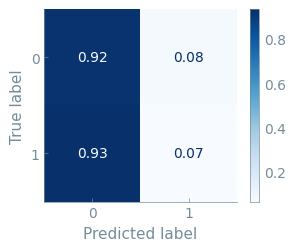

In [66]:
index_maxsize = compiled_res[compiled_res["train_size"]==max(compiled_res["train_size"])].index
conf_mats_max = [conf_mats[i] for i in index_maxsize]

actual_all, predicted_all = [], []
for index, _ in enumerate(conf_mats_max):
    preds = conf_mats_max[index]
    actual = preds["all_y_true"]
    predicted = preds["all_y_pred"]
    
    for true, pred in zip(actual, predicted):
        actual_all.append(true)
        predicted_all.append(pred)

confusion_matrix = metrics.confusion_matrix(actual_all, predicted_all)
confusion_matrix_norm = confusion_matrix.astype("float") / confusion_matrix.sum(axis=1)[:, np.newaxis]
print(confusion_matrix_norm)

cm = pycm.ConfusionMatrix(list(actual_all), list(predicted_all))
acc = cm.Overall_ACC

print(f'accuracy: {acc}')

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix_norm, display_labels = [0, 1])
cm_display.plot(cmap=plt.cm.Blues, include_values=True, values_format=".2f")
#plt.savefig('classif_MOFphotocat_confusionMatrix_73_27_size65_RF.pdf', bbox_inches='tight')